### Plot Emotion-Lexion

In [ ]:
def create_minute_dics_emolex(df, side, category, cumulative = False):
    minutes = range(120) 
    dic_minutes = {}

    for minute in minutes:    
        try:
            if cumulative:
                dic_minutes[minute] = sum(df[(df['side'] == side) & \
                                                    (df['ith_minute'] < minute + 1)][category])
            else:
                dic_minutes[minute] = sum(df[(df['side'] == side) & \
                                                    (df['ith_minute'] > minute) & \
                                                    (df['ith_minute'] < minute + 1)][category])
        except:
            dic_minutes[minute] = 0
        
    return (dic_minutes)


def plot_emolex(home_team, list_dic_minutes, colors, categorys, i_plot, limit=True):

    ax = plt.subplot(3,2,i_plot)
    if limit:
        ax.set_xlim([0, 60])
    else:
        ax.set_xlim([0, 120])

    for i in range(len(list_dic_minutes)):
        tweets = tuple(list(list_dic_minutes[i].values()))
        plot1 = plt.plot(tweets, label=categorys[i], alpha=0.5, color=colors[i])

    
    plt.xlabel('Minutes')
    plt.ylabel('Emotion Signals')
    plt.title('Emotion-Lexicon  (Home Team: %s)'  % home_team)
    plt.legend()
    plt.tight_layout()


def plot_three(df, home_team, away_team):
    side = ['home', 'away', 'both']
    categorys_neg = ['anger', 'fear', 'disgust', 'sadness', 'surprise']
    colors_neg = ['red', 'darkorange', 'darksalmon', 'palegreen', 'darkgreen']
    categorys_pos = ['trust', 'joy', 'anticipation']
    colors_pos = ['skyblue', 'purple', 'blue']
    categorys_sent = ['positive', 'negative']
    colors_sent = ['green', 'red']

    plt.figure(figsize=(15, 20))

    list_dic_minutes = []
    for category in categorys_neg:
        list_dic_minutes.append(create_minute_dics_emolex(df, side[0], category))
    plot_emolex(home_team, list_dic_minutes, colors_neg, categorys_neg, 1, False)

    list_dic_minutes = []
    for category in categorys_pos:
        list_dic_minutes.append(create_minute_dics_emolex(df, side[0], category))
    plot_emolex(home_team, list_dic_minutes, colors_pos, categorys_pos, 3, False)


    list_dic_minutes = []
    for category in categorys_sent:
        list_dic_minutes.append(create_minute_dics_emolex(df, side[0], category))
    plot_emolex(home_team, list_dic_minutes, colors_sent, categorys_sent, 5, False)

    
    list_dic_minutes = []
    for category in categorys_neg:
        list_dic_minutes.append(create_minute_dics_emolex(df, side[1], category))
    plot_emolex(away_team, list_dic_minutes, colors_neg, categorys_neg, 2, False)

    list_dic_minutes = []
    for category in categorys_pos:
        list_dic_minutes.append(create_minute_dics_emolex(df, side[1], category))
    plot_emolex(away_team, list_dic_minutes, colors_pos, categorys_pos, 4, False)


    list_dic_minutes = []
    for category in categorys_sent:
        list_dic_minutes.append(create_minute_dics_emolex(df, side[1], category))
    plot_emolex(away_team, list_dic_minutes, colors_sent, categorys_sent, 6, False)


    plt.show()

In [1]:
%pylab inline
%matplotlib inline

import os
os.chdir("/Users/Bya/git/predictEPL/MyFunctions/")
from dataIO import csv_dic_df

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.append("/Users/Bya/git/predictEPL/utils/")
sys.path.append("/Users/Bya/git/predictEPL/config/")

In [3]:
import paths
import my_plot

from useful_methods import FolderFiles
from useful_methods import csv_dic_df
from useful_methods import FilterDF
from useful_methods import PreprocessingTweet
from useful_methods import EmolexDic
from useful_methods import CreateEmolexDF

In [4]:
# choosing data
week = str(16)
GW = 'GW' + week
filenames = FolderFiles(GW + '/SingleGames', paths.READ_PATH_EXTRACTED_CSV, ends='.csv')
filenames

['Bournemouth_vs_United.csv',
 'City_vs_Swansea.csv',
 'Crystal_vs_Southampton.csv',
 'Liverpool_vs_WestBromwich.csv',
 'Norwich_vs_Everton.csv',
 'Sunderland_vs_Watford.csv',
 'Tottenham_vs_Newcastle.csv',
 'Villa_vs_Arsenal.csv',
 'WestHam_vs_Stoke.csv']

In [18]:
GW = 'GW' + str(16)
os.chdir(paths.READ_PATH_EXTRACTED_CSV + GW + '/SingleGames')
df = csv_dic_df(filenames[-1])
df[df['ith_minute'] == '100']

,date,ith_minute,side,status,tags,text,text_status,user,user_status
1719,Sat Dec 12 16:39:05 +0000 2015,100,home,retweet,"whufc,whustk",82: POST! @mau_zeta beats three defenders and ...,normal,london24sport,normal
1720,Sat Dec 12 16:39:08 +0000 2015,100,home,retweet,"whufc,whustk",82: POST! @mau_zeta beats three defenders and ...,normal,jordychilds,normal
1721,Sat Dec 12 16:39:10 +0000 2015,100,home,retweet,whufc,PIC: @EnnerValencia14 is back in a Claret and ...,normal,carlosfpc,normal
1722,Sat Dec 12 16:39:12 +0000 2015,100,home,retweet,"whufc,whustk",82: POST! @mau_zeta beats three defenders and ...,normal,kxuyate,normal
1723,Sat Dec 12 16:39:15 +0000 2015,100,home,retweet,"whufc,whustk",80: West Ham let Johnson go. He crosses from W...,normal,raypowerlee,normal
1724,Sat Dec 12 16:39:15 +0000 2015,100,home,retweet,"whufc,whustk",82: POST! @mau_zeta beats three defenders and ...,normal,fpl_man,normal
1725,Sat Dec 12 16:39:19 +0000 2015,100,both,tweet,"whufc,scfc",81 - @mau_zeta hits the post!! It's heating up...,normal,signal2official,normal
1726,Sat Dec 12 16:39:20 +0000 2015,100,home,retweet,"whufc,whustk",82: POST! @mau_zeta beats three defenders and ...,normal,matt4thehammer1,normal
1727,Sat Dec 12 16:39:20 +0000 2015,100,home,retweet,whufc,Look where I am lol #WHUFC https://t.co/ynsTWA...,normal,daveking321,normal
1728,Sat Dec 12 16:39:21 +0000 2015,100,home,tweet,"whufc,whustk","82: Moments later, a cross causes havoc but @P...",normal,whufc_official,normal


In [6]:
dic_emolex, dic_emolex_stemmed = EmolexDic()

All Words: 14182


In [7]:
dfEmolex = CreateEmolexDF(df, dic_emolex, dic_emolex_stemmed)
dfEmolex

,ith_minute,anger,fear,disgust,sadness,surprise,trust,joy,anticipation,positive,negative
0,1,5,7,0,7,7,19,9,15,17,13
1,2,2,4,0,4,5,13,7,15,14,6
2,3,0,1,0,0,6,5,8,12,18,0
3,4,2,3,0,2,10,12,15,22,29,5
4,5,2,2,0,3,3,8,4,8,17,5
5,6,2,3,0,3,4,5,2,10,12,3
6,7,5,6,0,5,4,10,5,10,21,7
7,8,5,5,0,3,6,11,9,8,22,4
8,9,1,3,0,2,2,6,2,4,11,3
9,10,8,14,0,10,7,16,9,13,23,15


In [8]:
dfEmolex = CreateEmolexDF(FilterDF(df), dic_emolex, dic_emolex_stemmed)
dfEmolex

,ith_minute,anger,fear,disgust,sadness,surprise,trust,joy,anticipation,positive,negative
0,1,5,7,0,7,7,16,9,15,15,13
1,2,2,4,0,4,5,13,7,15,14,6
2,3,0,1,0,0,6,5,8,12,18,0
3,4,2,3,0,2,10,11,15,22,28,5
4,5,2,2,0,3,3,7,4,8,16,5
5,6,2,3,0,3,4,5,2,10,10,3
6,7,5,6,0,5,4,10,5,10,21,7
7,8,5,5,0,3,6,11,9,8,20,4
8,9,1,3,0,2,2,6,2,4,11,3
9,10,4,7,0,4,3,8,5,6,11,6


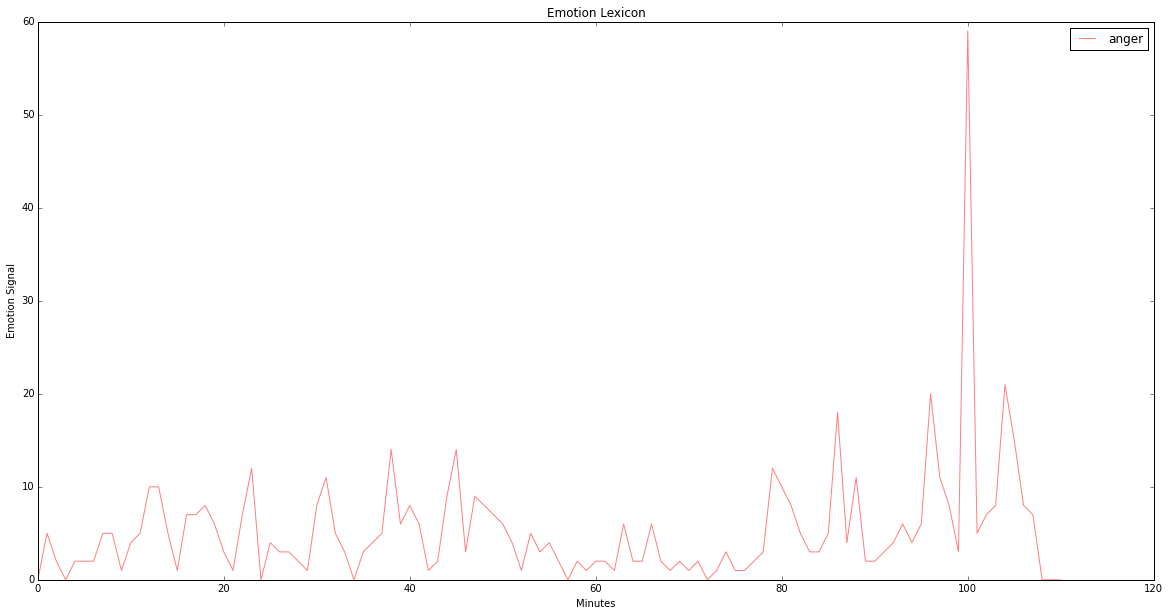

In [9]:
my_plot.PlotLineSingleChart(
    my_list=list(dfEmolex['anger']),
    label='anger',
    color='red',
    title='Emotion Lexicon',
    xlabel='Minutes',
    ylabel='Emotion Signal',
    width=20,
    height=10,
#     xlim=[0, 60],
#     ylim=[0, 30],
#     x_interval=5,
#     y_interval=5,
)

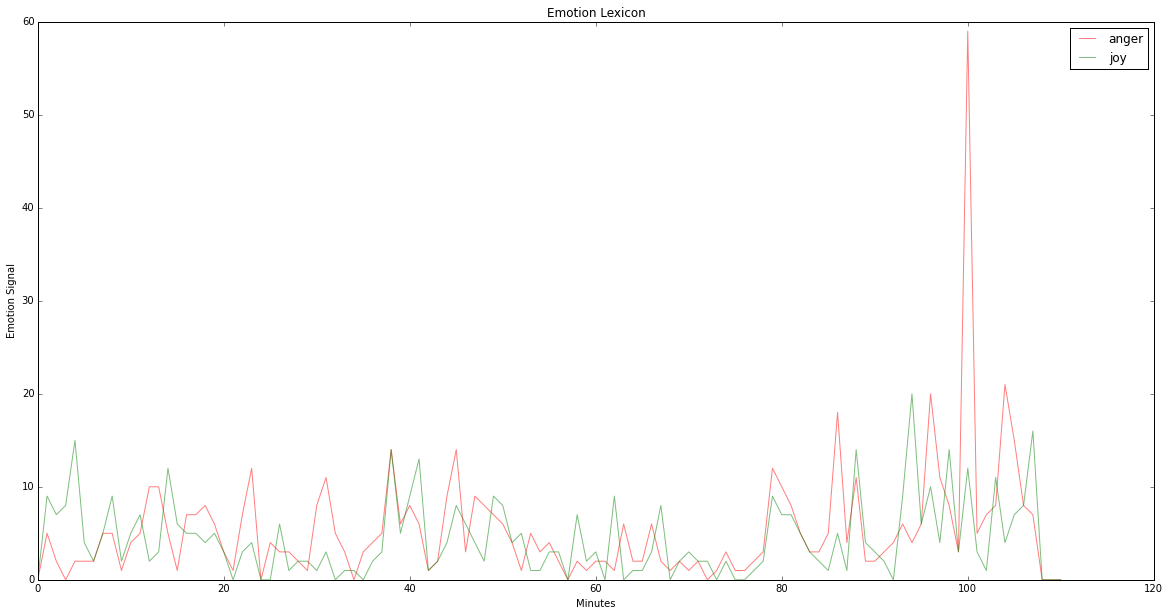

In [11]:
my_plot.PlotLineMultipleChart(
    my_list_list=[list(dfEmolex['anger']), list(dfEmolex['joy'])],
    labels=['anger', 'joy'],
    colors=['red', 'green'],
    title='Emotion Lexicon',
    xlabel='Minutes',
    ylabel='Emotion Signal',
#     width=20,
#     height=10,
#     xlim=[0, 60],
#     ylim=[0, 30],
#     x_interval=5,
#     y_interval=5,
)

In [21]:
dic_emolex['attack']

{'anger': 1,
 'anticipation': 0,
 'disgust': 0,
 'fear': 1,
 'joy': 0,
 'negative': 1,
 'positive': 0,
 'sadness': 0,
 'surprise': 0,
 'trust': 0}

In [28]:
df[df.user == 'whufc_official']['text'][39]

'LIVE: A final check on the teams and we make two enforced changes - Collins and Antonio in for the injured Reid and Moses #WHUFC #WHUSTK'